NBA Dataset

In [45]:
import numpy as np
import pandas as pd
from sklearn.cluster import KMeans #LA libreria tiene infinidad de algoritmos dentro
from scipy.cluster import hierarchy #jerarquico
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.cluster import AgglomerativeClustering 


In [46]:
nba_data = pd.read_csv("all_seasons.csv")
nba_data.head()

,Unnamed: 0,player_name,team_abbreviation,age,player_height,player_weight,college,country,draft_year,draft_round,...,pts,reb,ast,net_rating,oreb_pct,dreb_pct,usg_pct,ts_pct,ast_pct,season
0,0,Randy Livingston,HOU,22.0,193.04,94.800728,Louisiana State,USA,1996,2,...,3.9,1.5,2.4,0.3,0.042,0.071,0.169,0.487,0.248,1996-97
1,1,Gaylon Nickerson,WAS,28.0,190.50,86.182480,Northwestern Oklahoma,USA,1994,2,...,3.8,1.3,0.3,8.9,0.030,0.111,0.174,0.497,0.043,1996-97
2,2,George Lynch,VAN,26.0,203.20,103.418976,North Carolina,USA,1993,1,...,8.3,6.4,1.9,-8.2,0.106,0.185,0.175,0.512,0.125,1996-97
3,3,George McCloud,LAL,30.0,203.20,102.058200,Florida State,USA,1989,1,...,10.2,2.8,1.7,-2.7,0.027,0.111,0.206,0.527,0.125,1996-97
4,4,George Zidek,DEN,23.0,213.36,119.748288,UCLA,USA,1995,1,...,2.8,1.7,0.3,-14.1,0.102,0.169,0.195,0.500,0.064,1996-97


In [47]:
nba_data[(nba_data['draft_year'] == '2015') & (nba_data['draft_round'] == '1') & (nba_data['player_name'] == 'Kevon Looney')].sort_values(by = 'pts',ascending=False)

,Unnamed: 0,player_name,team_abbreviation,age,player_height,player_weight,college,country,draft_year,draft_round,...,pts,reb,ast,net_rating,oreb_pct,dreb_pct,usg_pct,ts_pct,ast_pct,season
12669,12669,Kevon Looney,GSW,27.0,205.74,100.697424,UCLA,USA,2015,1,...,7.0,9.3,2.5,4.4,0.135,0.234,0.104,0.639,0.136,2022-23
10509,10509,Kevon Looney,GSW,23.0,205.74,99.790240,UCLA,USA,2015,1,...,6.3,5.2,1.5,10.3,0.126,0.133,0.122,0.636,0.106,2018-19
12182,12182,Kevon Looney,GSW,26.0,205.74,100.697424,UCLA,USA,2015,1,...,6.0,7.3,2.0,6.0,0.120,0.210,0.120,0.586,0.127,2021-22
11573,11573,Kevon Looney,GSW,25.0,205.74,100.697424,UCLA,USA,2015,1,...,4.1,5.3,2.0,6.0,0.098,0.165,0.092,0.575,0.132,2020-21
9641,9641,Kevon Looney,GSW,22.0,205.74,99.790240,UCLA,USA,2015,1,...,4.0,3.3,0.6,6.1,0.094,0.135,0.121,0.588,0.062,2017-18
10720,10720,Kevon Looney,GSW,24.0,205.74,100.697424,UCLA,USA,2015,1,...,3.4,3.3,1.0,-18.3,0.098,0.151,0.147,0.403,0.120,2019-20
9136,9136,Kevon Looney,GSW,21.0,205.74,99.790240,UCLA,USA,2015,1,...,2.5,2.3,0.5,0.2,0.107,0.189,0.133,0.553,0.094,2016-17
9017,9017,Kevon Looney,GSW,20.0,205.74,99.790240,UCLA,USA,2015,1,...,1.8,2.0,0.0,-41.8,0.160,0.375,0.154,0.643,0.000,2015-16


In [48]:
#Valores nulos

count_null = nba_data.isnull().sum()
print(count_null)

Unnamed: 0              0
player_name             0
team_abbreviation       0
age                     0
player_height           0
player_weight           0
college              1854
country                 0
draft_year              0
draft_round             0
draft_number            0
gp                      0
pts                     0
reb                     0
ast                     0
net_rating              0
oreb_pct                0
dreb_pct                0
usg_pct                 0
ts_pct                  0
ast_pct                 0
season                  0
dtype: int64


Clases: Identificad una variable base que la podr´ıais considerar como variable objetivo sobre a que analizar´eis si hay separabilidad o no. Un ejemplo claro podr´ıa ser en el iris dataset, que se utilizan las 4 variables y la clase de flor la que se contrasta con los clusters generados (si tienen
#sentido claro).

Dubtes:
 - Haig de triar una variable que ja estigui al dataset com a variable objectiu?
 - Si son variables númeriques i continues, primer haure de fer algun tipo de preclasificació no?

Opcions: 
 - En base a les estadístiques de joc, decidir si son lotery pick, mid first round, initial or final second round
 - En base a les característiques físiques predir si son jugadors que juguen +80, +75, +70, +65 partits de mitjana per temporada
 - En base a les característiques físiques, predir la posició al camp P, PF, F, G, PG


# Variable Objetivo: Rebounds

Variable Objetivo:
    
La variable objetivo es aquella que vamos a analizar para ver si hay separabilidad o no entre los jugadores. En este caso, he decidido estudiar esto de la variable Rebotes. Queremos saber si hay separabilidad entre los jugadores relacionada con la cantidad de rebotes que cogen en cada partido. La teoría parece decir que si debería haberla, en función de la posición en el campo o el tipo de juego se deberían poder ver claras diferencias.

In [49]:
#Primero reduciremos la cantidad de datos quedandonos con las columnas que nos van a ayudar a clasificar

nba_final = nba_data[['player_height','player_weight','reb']]
nba_final.head()

,player_height,player_weight,reb
0,193.04,94.800728,1.5
1,190.50,86.182480,1.3
2,203.20,103.418976,6.4
3,203.20,102.058200,2.8
4,213.36,119.748288,1.7


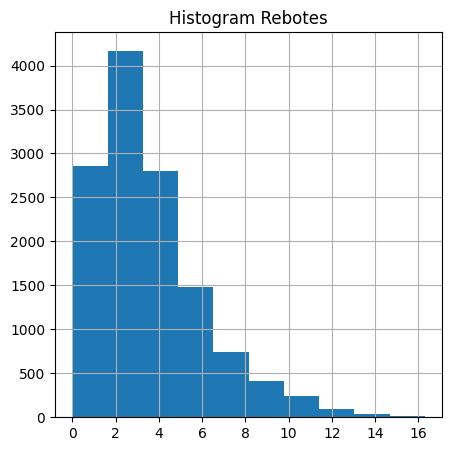

In [50]:
plt.figure(figsize=(5,5))
plt.title('Histogram Rebotes')
nba_final['reb'].hist()
plt.show()

In [51]:
nba_final['reb'].describe()

count    12844.000000
mean         3.558486
std          2.477885
min          0.000000
25%          1.800000
50%          3.000000
75%          4.700000
max         16.300000
Name: reb, dtype: float64

In [52]:
# Vamos a crear una nueva variable que agrupe los valores de los rebotes en distintos grupos

# Calculate the bin edges based on the 'reb' column values
bin_edges = np.arange(nba_final['reb'].min(), nba_final['reb'].max() + 2, 2)

# Use pd.cut to create the new column 'reb_class' with integer labels
nba_final['reb_class'] = pd.cut(nba_final['reb'], bins=bin_edges, labels=False, right=False)

# Display the DataFrame with the new 'reb_class' column
nba_final.head()



C:\Users\Marc\AppData\Local\Temp\ipykernel_27464\2907655943.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  nba_final['reb_class'] = pd.cut(nba_final['reb'], bins=bin_edges, labels=False, right=False)


,player_height,player_weight,reb,reb_class
0,193.04,94.800728,1.5,0
1,190.50,86.182480,1.3,0
2,203.20,103.418976,6.4,3
3,203.20,102.058200,2.8,1
4,213.36,119.748288,1.7,0


In [53]:
print(nba_final.reb_class.value_counts())

reb_class
1    4722
0    3726
2    2453
3    1080
4     525
5     241
6      76
7      18
8       3
Name: count, dtype: int64


# Exploración de los datos

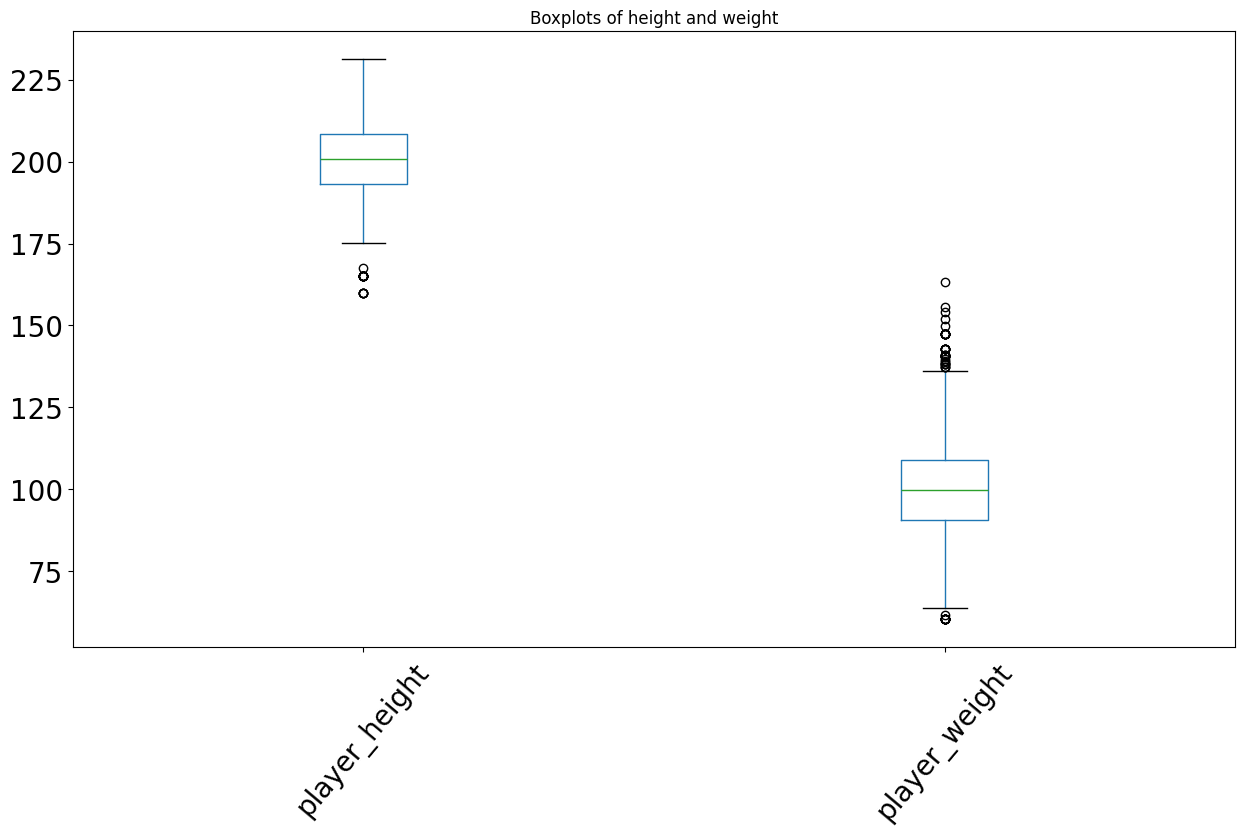

In [54]:
boxplot1 = ['player_height', 'player_weight']
subset_data = nba_final[boxplot1]

plt.figure(figsize=(15, 8))
plt.title('Boxplots of height and weight')
subset_data.boxplot(grid=False, rot=50, fontsize=20)
plt.show()

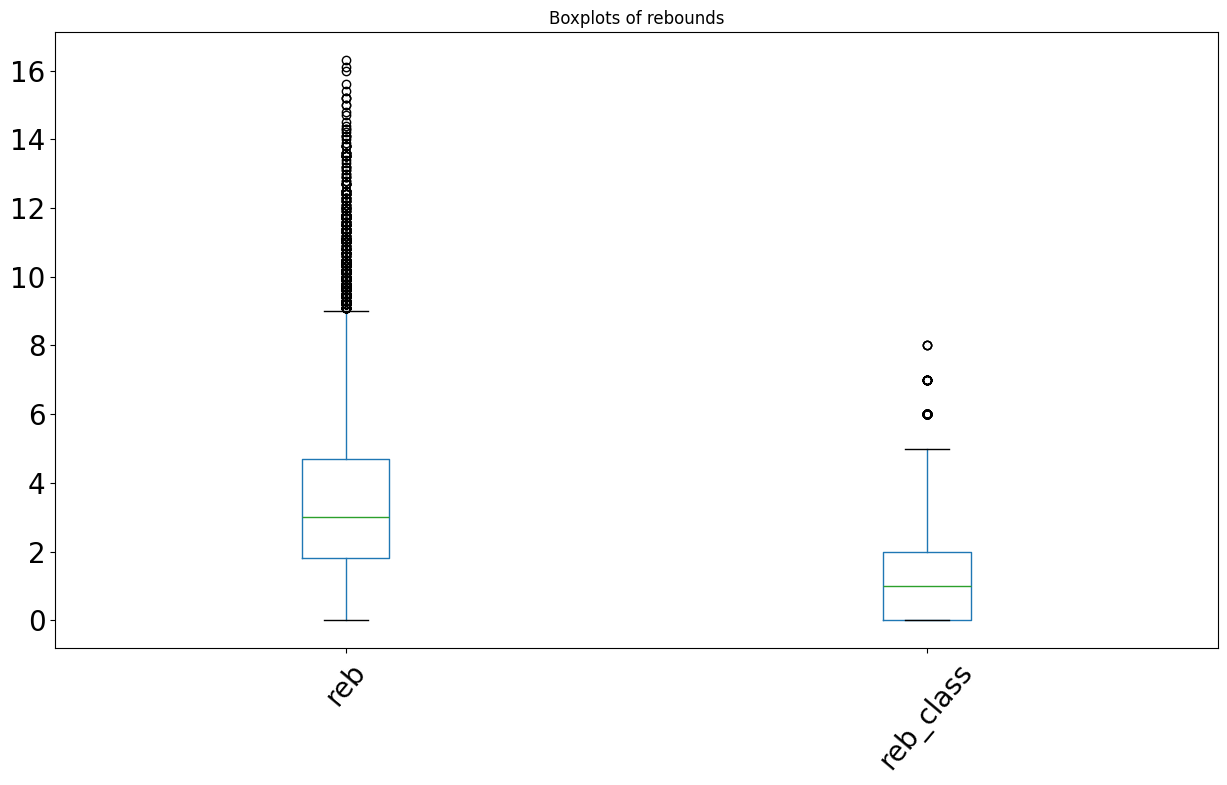

In [55]:
boxplot2 = ['reb', 'reb_class']
subset_data = nba_final[boxplot2]

plt.figure(figsize=(15, 8))
plt.title('Boxplots of rebounds')
subset_data.boxplot(grid=False, rot=50, fontsize=20)
plt.show()

<Figure size 1500x800 with 0 Axes>

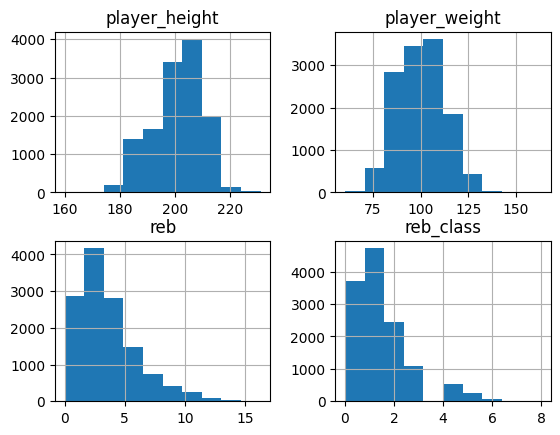

In [56]:
plt.figure(figsize = (15,8))
nba_final.hist()
plt.show()

<Figure size 500x2000 with 0 Axes>

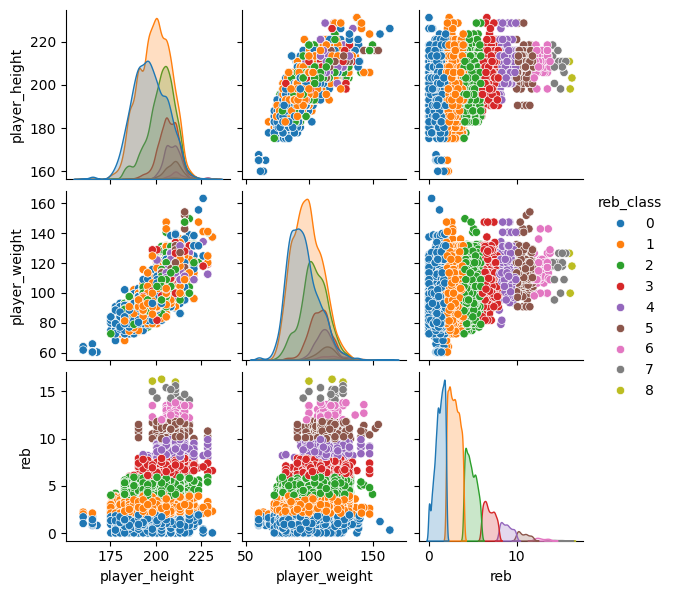

In [57]:
# Scatter plot using seaborn package
plt.figure(figsize = (5, 20))
sns.pairplot(nba_final,  hue='reb_class', height=2, palette = "tab10")
plt.show()

<Axes: >

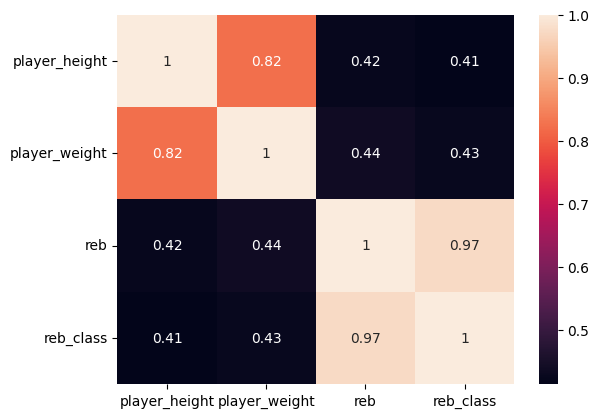

In [58]:
#Graficamos

sns.heatmap(nba_final.corr(), annot = True)

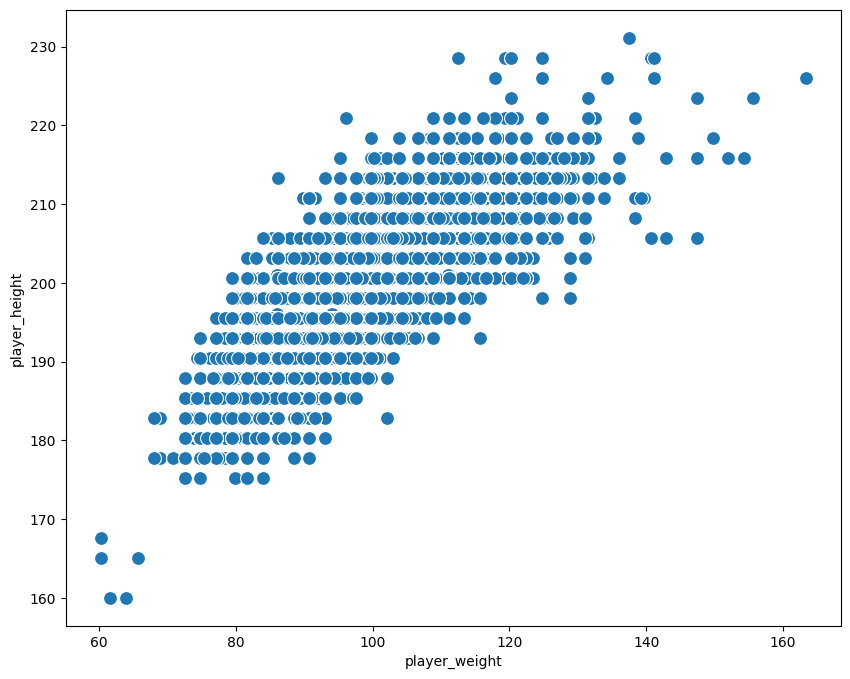

In [59]:
plt.figure(figsize = (10, 8))
sns.scatterplot(data = nba_final, x = 'player_weight', y = 'player_height', s = 100)
plt.show()

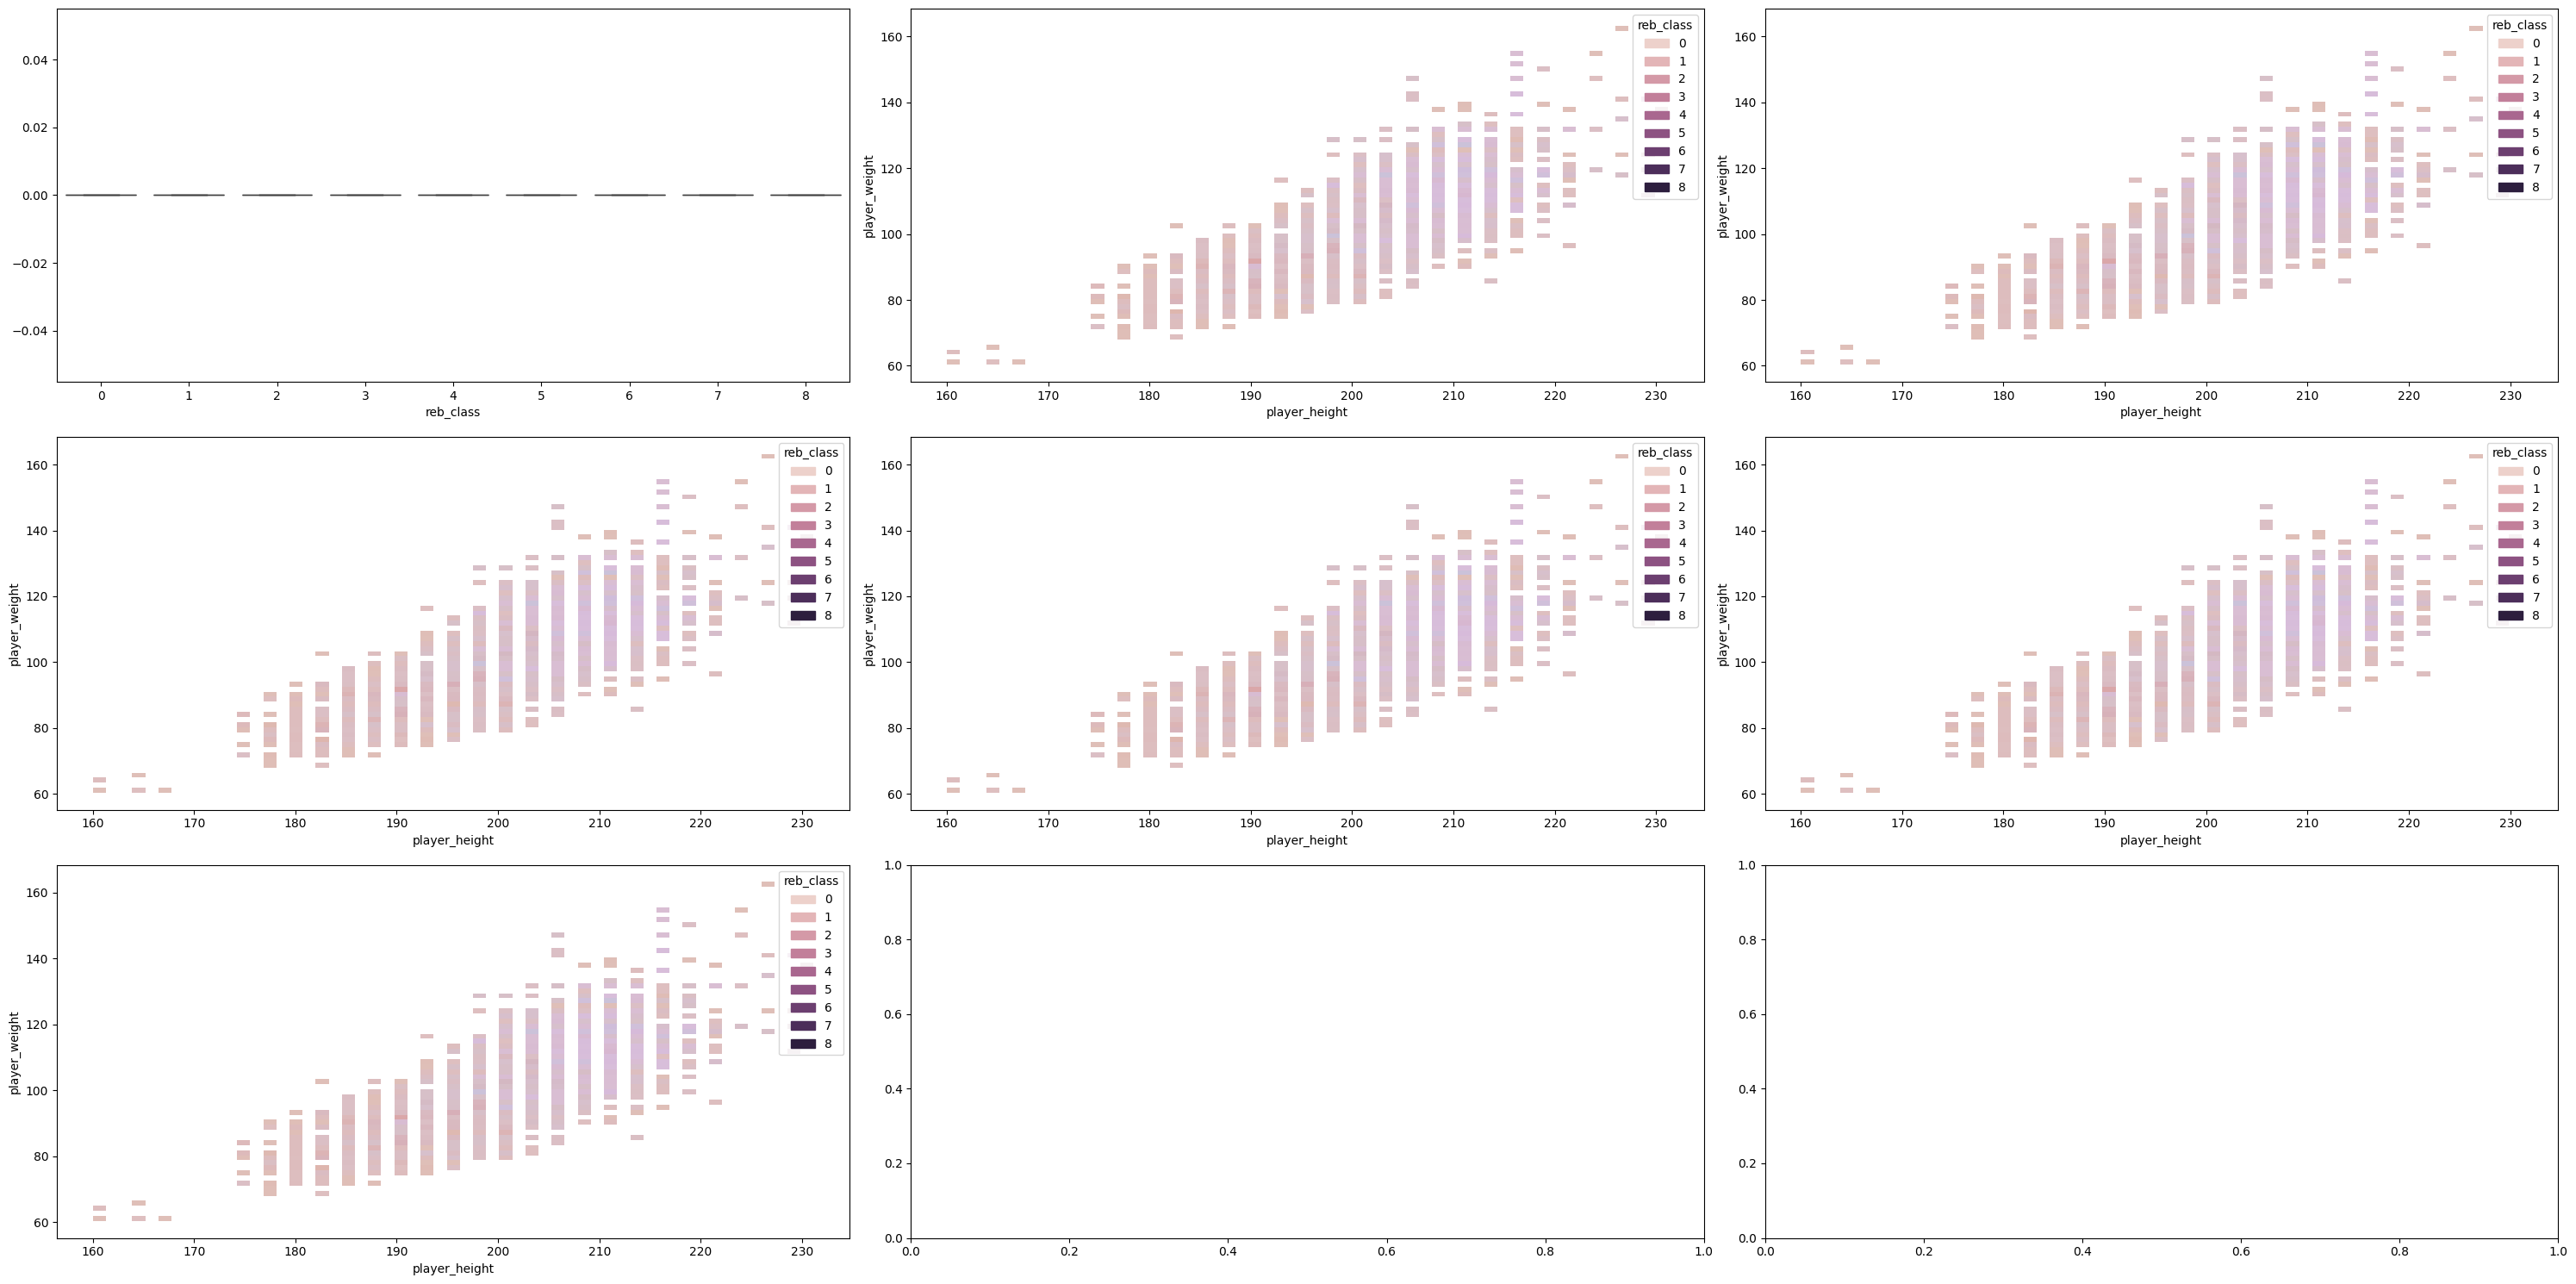

In [60]:
#No funciona!
# Distribución de la altura y el peso en función del grupo reboteador

fig,axes=plt.subplots(3,3,figsize=(30,15))
sns.boxplot(data= nba_final, x='reb_class', y='player_height' == 0, ax=axes[0,0])
sns.histplot(data= nba_final, x='player_height', y='player_weight', hue = 'reb_class', ax=axes[0,1])
sns.histplot(data= nba_final, x='player_height', y='player_weight', hue = 'reb_class', ax=axes[0,2])
sns.histplot(data= nba_final, x='player_height', y='player_weight', hue = 'reb_class', ax=axes[1,0])
sns.histplot(data= nba_final, x='player_height', y='player_weight', hue = 'reb_class', ax=axes[1,1])
sns.histplot(data= nba_final, x='player_height', y='player_weight', hue = 'reb_class', ax=axes[1,2])
sns.histplot(data= nba_final, x='player_height', y='player_weight', hue = 'reb_class', ax=axes[2,0])
plt.tight_layout()

In [61]:
# 1- Partir el dataset y los targets en entrenamiento y validación con el método train_test_split.
from sklearn.model_selection import train_test_split

# Selección de los datos para entrenamiento y el atributo objetivo
x_measures = nba_final.values[:,:-2]
y_rebs = nba_final.values[:,-2].astype("int")

# La partición se realiza 80% entrenamiento y 20% de validación para tener más muestras de entrenamiento debido al tamaño
# del dataset. Fijando random_state nos aseguramos la repetibilidad del resultado en ejecuciones posteriores.
X_train, X_test, Y_train, Y_test = train_test_split(x_measures, y_rebs, test_size=0.25, random_state=4)

print("Training Dataset:",X_train.shape)
print("Validation Dataset:",X_test.shape)

Training Dataset: (9633, 2)
Validation Dataset: (3211, 2)


# K - Means

Vamos a intentar escoger la cantidad de clústerest optima, realmente podríamos intentar intuir-la porque existen 5 posiciones distintas en pista. Pero también es cierto que las estadísticas reboteadoras entre bases&escoltas y ala-pívot&pívot suelen ser parecidas, así que igual nos propone hacer menos clústers

c:\Users\Marc\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\Marc\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\Marc\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\Marc\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\cluster\

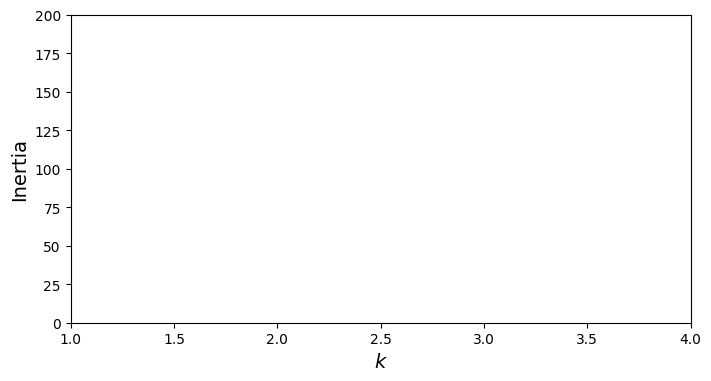

In [64]:
# Generación de 'k' modelos KMeans para el cálculo de inercias, con todo el dataset conjuntamente
kmeans = [KMeans(n_clusters=k, random_state=4).fit(x_measures) for k in range(1, 20)]

# Cálculo de la inercia por cada modelo generado previamente. El resultado es un vector que se dibujará para analizar el codo
inertias = [nba_model.inertia_ for nba_model in kmeans]

# Caracterización de la figura a mostrar
plt.figure(figsize=(8, 4))

# Visualización del rango de inercias de color azul, marcando los puntos y uniendo con línea
plt.plot(range(1, 20), inertias)

# Etiquetas ejes horizontal y vertical
plt.xlabel("$k$", fontsize=14)
plt.ylabel("Inertia", fontsize=14)

# límites de los ejes
plt.axis([1, 4, 0, 200])
plt.show()

In [66]:
# Generación del modelo con 3 clústeres y predicción de éste
kmeans_final = KMeans(n_clusters=5, random_state = 0).fit(X_train)

# Una vez el algoritmo se ha entrenado, generar predicciones
pred_kmeans_final = kmeans_final.fit_predict(X_test)

# Comparativa de las predicciones con los valores reales utilizando la función confusion matrix
from sklearn.metrics import confusion_matrix

confusion_matrix(Y_test, pred_kmeans_final)

c:\Users\Marc\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\Marc\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


array([[ 67,  26,  82,  72,  16,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0],
       [186, 106, 219, 134,  38,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0],
       [185, 123, 166, 107,  48,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0],
       [154, 141, 121,  54,  49,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0],
       [164, 114,  54,  18,  46,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0],
       [ 81,  93,  19,   6,  34,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0],
       [ 58,  72,   7,   1,  31,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0],
       [ 18,  62,   3,   0,  31,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0],
       [  7,  41,   0,   1,  18,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0],
       [ 12,  35,   0,   0,   9,   0,   0,   0,   0,   0,   0,   0,   0,
         

# Jerárquico

In [63]:
Z = hierarchy.linkage(nba_final)

plt.figure(figsize = (30, 10))
# Color threshold is basically where do we apply the 'cut' (linkage metric). For us, is all those elements closer than the value
# count_sort just sorts from bigger to smaller

cLimit = 8
dn = hierarchy.dendrogram(Z, color_threshold = cLimit, count_sort = "ascending") # ascending/descending are both acceptable
plt.hlines(cLimit, 0, 1600, color = 'r')

# Summarized dendogram (need to comment the previous dn!)
#dn = hierarchy.dendrogram(Z, truncate_mode = 'lastp', color_threshold = cLimit, count_sort = "ascending")
plt.title("Iris dataset", fontsize = 10)
plt.xticks(fontsize = 10)
plt.show()


KeyboardInterrupt: 

In [ ]:
clustering = AgglomerativeClustering(n_clusters = 5).fit(nba_final)

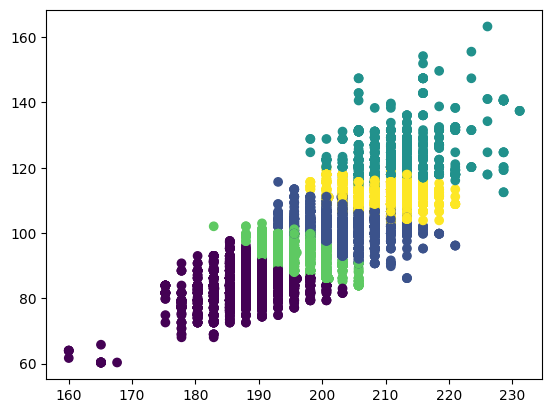

In [ ]:
x = nba_final['player_height']
y = nba_final["player_weight"]
plt.scatter(x, y, c = clustering.labels_)